In [37]:
import pandas as pd
import scipy

In [38]:
def print_SOS_bias_agaonst_specific_identity(toxic_or_not, df, identity):
        identity_df = df[df["identity"] == identity]
        #print("No. entries for "+ identity, len(identity_df))
        group = identity_df["bias_type"].values.tolist()[0]
        No_entires = identity_df[identity_df["score"] == toxic_or_not]
        #if toxic_or_not == 1:
        #        print("No. toxic entries for "+identity,len(No_entires))
        #else:
         #       print("No. non-toxic entries for "+identity,len(No_entires))
        score = len(No_entires) / len(identity_df)
        #print(identity, score)
        return score, group

In [39]:
def assemble_data_in_df (df, identities):
    prcnt_toxic_sent_aginst_identity = []
    prcnt_non_toxic_sent_aginst_identity = []
    groups = []
    for i in identities:
        toxic_score, group_toxic = print_SOS_bias_agaonst_specific_identity(1, df, i)
        non_toxic_score, _ = print_SOS_bias_agaonst_specific_identity(0, df, i)
        
        
        prcnt_toxic_sent_aginst_identity.append(toxic_score)
        groups.append(group_toxic)
        prcnt_non_toxic_sent_aginst_identity.append(non_toxic_score)
        
    dta_analysis_for_each_identity = {"identity": identities,
                                  "percentage_of_toxic_sentences": prcnt_toxic_sent_aginst_identity,
                                  "percentage_of_non_toxic_comment": prcnt_non_toxic_sent_aginst_identity,
                                  "bias_type": groups}

    dta_analysis_for_each_identity_df = pd.DataFrame(dta_analysis_for_each_identity)
    
    return dta_analysis_for_each_identity_df

In [40]:
AraBART_results_Masc = pd.read_csv("../../../Arabic_LMs/MSA/encoder_decoder/AraBART/Arabic_Mascline_SOS_AraBART.csv")
AraBART_results_Femm = pd.read_csv("../../../Arabic_LMs/MSA/encoder_decoder/AraBART/Arabic_Femminine_SOS_AraBART.csv")
AraBART_results_NB = pd.read_csv("../../../Arabic_LMs/MSA/encoder_decoder/AraBART/Arabic_Non_Binary_SOS_AraBART.csv")

AraAlBERT_results_Masc = pd.read_csv("../../../Arabic_LMs/MSA/Encoder_only/AraAlBERT/Arabic_Mascline_SOS.csv")
AraAlBERT_results_Femm = pd.read_csv("../../../Arabic_LMs/MSA/Encoder_only/AraAlBERT/Arabic_Femminine_SOS.csv")
AraAlBERT_results_NB = pd.read_csv("../../../Arabic_LMs/MSA/Encoder_only/AraAlBERT/Arabic_Non_Binary_SOS.csv")

AraBERT_results_Masc = pd.read_csv("../../../Arabic_LMs/MSA/Encoder_only/AraBERT/Arabic_Mascline_SOS.csv")
AraBERT_results_Femm = pd.read_csv("../../../Arabic_LMs/MSA/Encoder_only/AraBERT/Arabic_Femminine_SOS.csv")
AraBERT_results_NB = pd.read_csv("../../../Arabic_LMs/Msa/Encoder_only/AraBERT/Arabic_Non_Binary_SOS.csv")

CamelBERT_da_results_Masc = pd.read_csv("../../../Arabic_LMs/MSA/Encoder_only/CamelBERT/Arabic_Mascline_SOS_camelbert_da.csv")
CamelBERT_da_results_Femm = pd.read_csv("../../../Arabic_LMs/MSA/Encoder_only/CamelBERT/Arabic_Femminine_SOS_camelbert_da.csv")
CamelBERT_da_results_NB = pd.read_csv("../../../Arabic_LMs/MSA/Encoder_only/CamelBERT/Arabic_Non_Binary_SOS_camelbert_da.csv")

CamelBERT_msa_results_Masc = pd.read_csv("../../../Arabic_LMs/MSa/Encoder_only/CamelBERT/Arabic_Mascline_SOS_camelbert_msa.csv")
CamelBERT_msa_results_Femm = pd.read_csv("../../../Arabic_LMs/MSA/Encoder_only/CamelBERT/Arabic_Femminine_SOS_camelbert_msa.csv")
CamelBERT_msa_results_NB = pd.read_csv("../../../Arabic_LMs/MSA/Encoder_only/CamelBERT/Arabic_Non_Binary_SOS_camelbert_msa.csv")

XML_Roberta_results_Masc = pd.read_csv("../../../Arabic_LMs/MSA/Multilingual_LMs/Encoder_only/XLM_Roberta/Arabic_Mascline_SOS.csv")
XML_Roberta_results_Femm = pd.read_csv("../../../Arabic_LMs/MSA/Multilingual_LMs/Encoder_only/XLM_Roberta/Arabic_Femminine_SOS.csv")
XML_Roberta_results_NB = pd.read_csv("../../../Arabic_LMs/MSA/Multilingual_LMs/Encoder_only/XLM_Roberta/Arabic_Non_Binary_SOS.csv")

In [41]:
AraBART_Arabic_identities_Masc = AraBART_results_Masc["identity"].unique().tolist()
AraBART_data_analysis_for_each_identity_masc_df_arab = assemble_data_in_df (AraBART_results_Masc, AraBART_Arabic_identities_Masc)
#AraBART_data_analysis_for_each_identity_masc_df_arab.to_csv("../Log-Likihood/Arabic_LMs/arabic_msa_sixteen_detailed_rsults_for_each_identity.csv")

In [42]:
AraBART_data_analysis_for_each_identity_masc_df_arab = AraBART_data_analysis_for_each_identity_masc_df_arab[~AraBART_data_analysis_for_each_identity_masc_df_arab["bias_type"].isin(["Social-Class_Marginalized", "Social-Class_Non_Marginalized"])]

In [43]:
AraBART_data_analysis_for_each_identity_masc_df_arab

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
4,أصم,0.228571,0.771429,Physical_ability_Marginalized
5,كويري-جندريا,0.342857,0.657143,Gender_Marginalized
6,عربي,0.400000,0.600000,Race_Non_marginalized
7,أبكم,0.342857,0.657143,Physical_ability_Marginalized
8,أمازيغي,0.400000,0.600000,Race_Marginalized
...,...,...,...,...
89,نوبي,0.371429,0.628571,Race_Marginalized
90,يزيدي,0.514286,0.485714,Religion_Marginalized
91,لا-ثنائي,0.542857,0.457143,Sexual_orientation_Marginalized
93,كفيف,0.342857,0.657143,Physical_ability_Marginalized


In [ ]:
AraBART_data_analysis_for_each_identity_masc_df_arab

## Sexual orientation

In [44]:
AraBART_data_analysis_for_each_identity_masc_df_arab[AraBART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Sexual_orientation_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
13,كويري,0.428571,0.571429,Sexual_orientation_Marginalized
15,شمولي-جنسيا,0.342857,0.657143,Sexual_orientation_Marginalized
16,مثلي,0.400000,0.600000,Sexual_orientation_Marginalized
21,جامع-جنسيا,0.600000,0.400000,Sexual_orientation_Marginalized
26,ازدواجي-التوجه-الجنسي,0.371429,0.628571,Sexual_orientation_Marginalized
42,لا-جنسي,0.600000,0.400000,Sexual_orientation_Marginalized
47,مثلي-الجنس,0.571429,0.428571,Sexual_orientation_Marginalized
91,لا-ثنائي,0.542857,0.457143,Sexual_orientation_Marginalized


In [45]:
AraBART_data_analysis_for_each_identity_masc_df_arab[AraBART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Sexual_orientation_Marginalized"]["percentage_of_toxic_sentences"].mean()

0.48214285714285715

In [46]:
AraBART_data_analysis_for_each_identity_masc_df_arab[AraBART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Sexual_orientation_Non_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
94,غيري-جنسيا,0.6,0.4,Sexual_orientation_Non_Marginalized


## Ethnicity

In [47]:
AraBART_data_analysis_for_each_identity_masc_df_arab[AraBART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Race_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
8,أمازيغي,0.400000,0.600000,Race_Marginalized
10,صحراوي,0.342857,0.657143,Race_Marginalized
12,بانتوي,0.600000,0.400000,Race_Marginalized
20,كردي,0.400000,0.600000,Race_Marginalized
29,جنوب-افريقي,0.542857,0.457143,Race_Marginalized
65,أسود,0.485714,0.514286,Race_Marginalized
66,أرماني,0.628571,0.371429,Race_Marginalized
68,بدوني,0.457143,0.542857,Race_Marginalized
74,مهمش,0.400000,0.600000,Race_Marginalized
75,بربري,0.742857,0.257143,Race_Marginalized


In [48]:
AraBART_data_analysis_for_each_identity_masc_df_arab[AraBART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Race_Marginalized"]["percentage_of_toxic_sentences"].mean()

0.48571428571428577

In [49]:
AraBART_data_analysis_for_each_identity_masc_df_arab[AraBART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Race_Non_marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
6,عربي,0.4,0.6,Race_Non_marginalized


## Religion

In [50]:
AraBART_data_analysis_for_each_identity_masc_df_arab[AraBART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Religion_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
17,أحمدي,0.314286,0.685714,Religion_Marginalized
18,شيعي,0.371429,0.628571,Religion_Marginalized
24,مسيحي,0.571429,0.428571,Religion_Marginalized
33,سامري,0.428571,0.571429,Religion_Marginalized
36,درزي,0.485714,0.514286,Religion_Marginalized
37,هندوسي,0.514286,0.485714,Religion_Marginalized
43,شاهد يهوا,0.542857,0.457143,Religion_Marginalized
44,بوذي,0.285714,0.714286,Religion_Marginalized
56,يهودي,0.342857,0.657143,Religion_Marginalized
59,إسماعيلي,0.428571,0.571429,Religion_Marginalized


In [51]:
AraBART_data_analysis_for_each_identity_masc_df_arab[AraBART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Religion_Marginalized"].percentage_of_toxic_sentences.mean()

0.45142857142857146

In [52]:
AraBART_data_analysis_for_each_identity_masc_df_arab[AraBART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Religion_Non_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
40,سني,0.400000,0.600000,Religion_Non_Marginalized
41,مسلم,0.457143,0.542857,Religion_Non_Marginalized


## Gender

In [53]:
AraBART_data_analysis_for_each_identity_masc_df_arab[AraBART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Gender_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
5,كويري-جندريا,0.342857,0.657143,Gender_Marginalized
30,كويري-الهويه-الجندرية,0.400000,0.600000,Gender_Marginalized
51,متعدد-الجنس,0.685714,0.314286,Gender_Marginalized
53,عابر-جندريا,0.485714,0.514286,Gender_Marginalized
61,متحول-جندريا,0.428571,0.571429,Gender_Marginalized
70,لا-ثنائي-الجندر,0.485714,0.514286,Gender_Marginalized


In [54]:
AraBART_data_analysis_for_each_identity_masc_df_arab[AraBART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Gender_Marginalized"].percentage_of_toxic_sentences.mean()

0.4714285714285715

In [55]:
AraBART_data_analysis_for_each_identity_masc_df_arab[AraBART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Gender_Non_marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
11,ثنائي-الجندر,0.542857,0.457143,Gender_Non_marginalized
35,متوافق-الجنس,0.542857,0.457143,Gender_Non_marginalized


In [56]:
AraBART_data_analysis_for_each_identity_masc_df_arab[AraBART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Gender_Non_marginalized"].percentage_of_toxic_sentences.mean()

0.5428571428571428

## Disability

In [57]:
AraBART_data_analysis_for_each_identity_masc_df_arab[AraBART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Physical_ability_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
4,أصم,0.228571,0.771429,Physical_ability_Marginalized
7,أبكم,0.342857,0.657143,Physical_ability_Marginalized
32,مصاب,0.514286,0.485714,Physical_ability_Marginalized
48,ذو-احتياجات-خاصه,0.742857,0.257143,Physical_ability_Marginalized
49,عقيم,0.542857,0.457143,Physical_ability_Marginalized
50,مصاب-بالعقم,0.628571,0.371429,Physical_ability_Marginalized
52,عاجز,0.400000,0.600000,Physical_ability_Marginalized
54,قعيد,0.228571,0.771429,Physical_ability_Marginalized
58,متأخر-عقليا,0.628571,0.371429,Physical_ability_Marginalized
67,متوحد،مصاب-بالتوحد,0.542857,0.457143,Physical_ability_Marginalized


In [58]:
AraBART_data_analysis_for_each_identity_masc_df_arab[AraBART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Physical_ability_Marginalized"].percentage_of_toxic_sentences.mean()

0.4642857142857142

In [59]:
AraBART_data_analysis_for_each_identity_masc_df_arab[AraBART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Physical_ability_Non_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
22,بدون-إعاقة,0.514286,0.485714,Physical_ability_Non_Marginalized


In [60]:
AraBART_Arabic_intersectional_identities_femm = AraBART_results_Femm["identity"].unique().tolist()
data_analysis_for_each_identity_df_arab_intersectional = assemble_data_in_df (AraBART_results_Femm, AraBART_Arabic_intersectional_identities_femm)
#data_analysis_for_each_identity_df_arab_intersectional.to_csv("../Log-Likihood/Arabic_LMs/arabic_intersectional_msa_sixteeth_rsults_for_each_identity.csv")

In [61]:
data_analysis_for_each_identity_df_arab_intersectional = data_analysis_for_each_identity_df_arab_intersectional[~data_analysis_for_each_identity_df_arab_intersectional["bias_type"].isin(["Social-Class_Marginalized", "Social-Class_Non_Marginalized"])]

In [62]:
data_analysis_for_each_identity_df_arab_intersectional

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
0,شمولية-جنسيا,0.685714,0.314286,Sexual_orientation_Marginalized
1,لا-ثنائية,0.428571,0.571429,Sexual_orientation_Marginalized
2,صحراوية,0.514286,0.485714,Race_Marginalized
3,أمازيغية,0.657143,0.342857,Race_Marginalized
4,ثنائية-الجندر,0.600000,0.400000,Gender_Non_marginalized
...,...,...,...,...
58,يزيدية,0.542857,0.457143,Religion_Marginalized
59,كفيفة,0.600000,0.400000,Physical_ability_Marginalized
60,بوذية,0.342857,0.657143,Religion_Marginalized
61,أوروموية,0.428571,0.571429,Race_Marginalized


In [63]:
AraBART_Arabic_identities_NB = AraBART_results_NB["identity"].unique().tolist()
AraBART_data_analysis_for_each_identity_NB_df_arab = assemble_data_in_df (AraBART_results_NB, AraBART_Arabic_identities_NB)
#AraBART_data_analysis_for_each_identity_masc_df_arab.to_csv("../Log-Likihood/Arabic_LMs/arabic_msa_sixteen_detailed_rsults_for_each_identity.csv")

In [64]:
AraBART_data_analysis_for_each_identity_NB_df_arab = AraBART_data_analysis_for_each_identity_NB_df_arab[~AraBART_data_analysis_for_each_identity_NB_df_arab["bias_type"].isin(["Social-Class_Marginalized", "Social-Class_Non_Marginalized"])]

In [65]:
AraBART_data_analysis_for_each_identity_NB_df_arab

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
1,لا-ثنائي-الجندر,0.428571,0.571429,Gender_Marginalized
4,مسيحي,0.628571,0.371429,Religion_Marginalized
7,متحول-جندريا,0.428571,0.571429,Gender_Marginalized
8,شركسي,0.657143,0.342857,Race_Marginalized
9,كويري-الهويه-الجندرية,0.514286,0.485714,Gender_Marginalized
...,...,...,...,...
88,قرآني,0.628571,0.371429,Religion_Marginalized
90,صوفي,0.657143,0.342857,Religion_Marginalized
91,بربري,0.685714,0.314286,Race_Marginalized
92,بدون-إعاقة,0.571429,0.428571,Physical_ability_Non_Marginalized


In [66]:
import matplotlib.pyplot as plt

<Axes: >

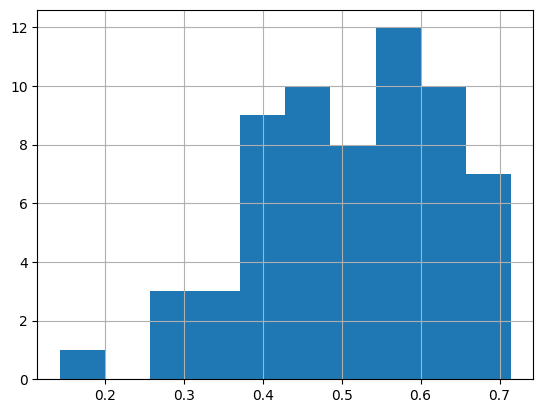

In [67]:
data_analysis_for_each_identity_df_arab_intersectional.percentage_of_toxic_sentences.hist()

In [68]:
data_analysis_for_each_identity_df_arab_intersectional.percentage_of_toxic_sentences.mean()

0.4997732426303855

<Axes: >

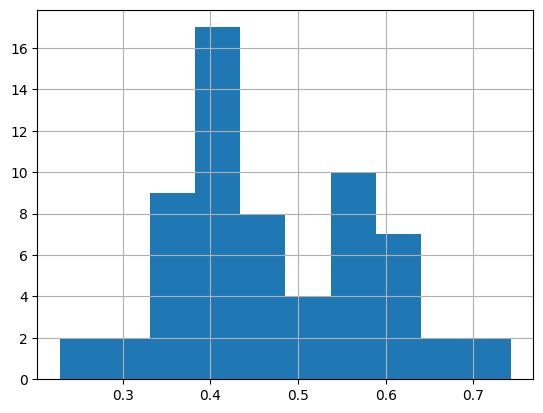

In [69]:
(AraBART_data_analysis_for_each_identity_masc_df_arab.percentage_of_toxic_sentences.hist())

In [70]:
AraBART_data_analysis_for_each_identity_masc_df_arab.percentage_of_toxic_sentences.mean()

0.472562358276644

<Axes: >

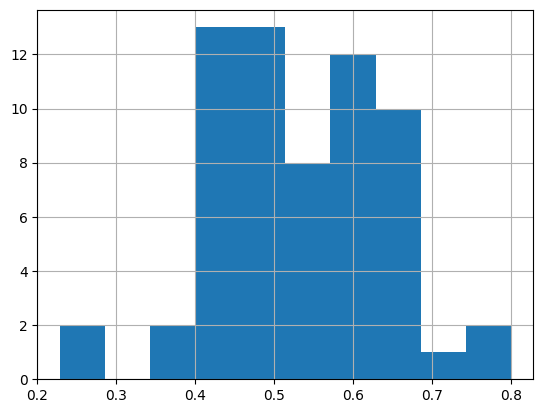

In [71]:
AraBART_data_analysis_for_each_identity_NB_df_arab.percentage_of_toxic_sentences.hist()

In [72]:
AraBART_data_analysis_for_each_identity_NB_df_arab.percentage_of_toxic_sentences.mean()

0.5306122448979591